## Profundizando el análisis
Ahora conocemos qué hay en las variables y cómo se ven profundicemos el análisis para intentar comenzar a responder las preguntas que nos interesan. Enfocaremos el análisis en la **variable objetivo**. Al inicio planteamos que lo que queremos analizar es la supervivencia así que eso haremos.

Comenzaremos a explorar la variable `Survived` utilizando otras variables que tenemos disponibles.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# cargar los datos
# cargaremos los datos de un archivo csv
# Este archivo debe estar en la misma carpeta del notebook.
# Si se encuentra en otra carpeta podemos especificar la ruta.
data=pd.read_csv('titanic_train.csv')


In [ ]:
data[['Sex', 'Survived']].value_counts()

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

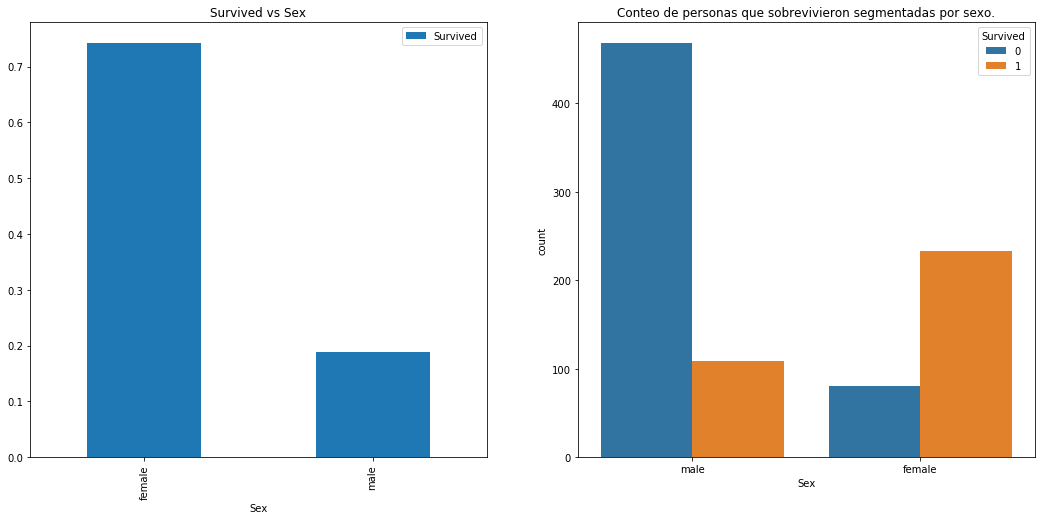

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Conteo de personas que sobrevivieron segmentadas por sexo.')

plt.show()


El número de hombres en el barco es mayor. El número de mujeres que se salvaron es casi el doble del número de hombres. Esto parece ser relevante para modelar la supervivencia en el barco.


### PClass
**pclass: A proxy for socio-economic status (SES)**
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

In [ ]:
# conteos de las distintas clases
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
# conteo de las clases de las personas que sobrevivieron
data[data['Survived'] == 1].Pclass.value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [ ]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


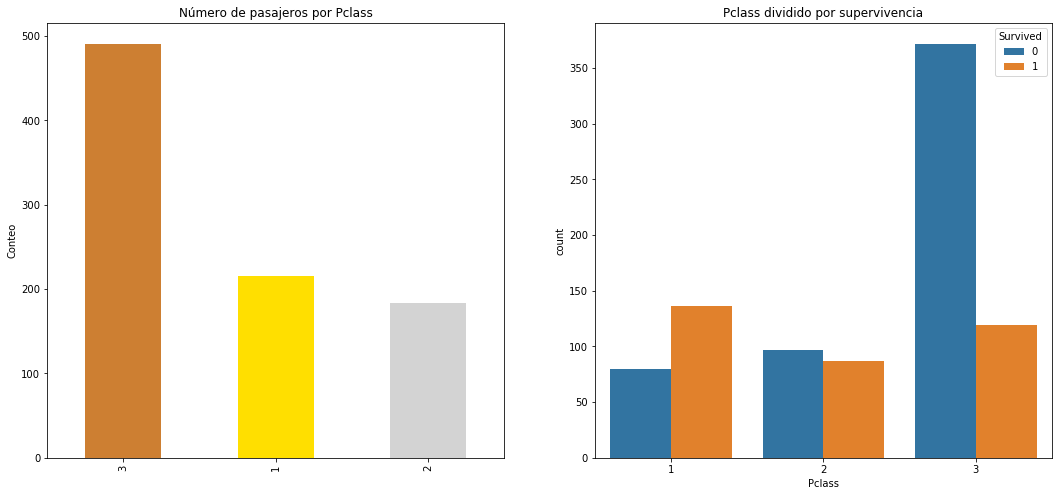

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
# Número de pasajeros por Pclass
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Número de pasajeros por Pclass')
ax[0].set_ylabel('Conteo')

sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass dividido por supervivencia')
plt.show()

Podemos observar que el tipo de ticket sí parece afectar la supervivencia.
Pclass 3 tiene la mayor cantidad de muertes. Aún cuando el número de pasajeros de clase 3 es mucho mayor el número de supervivencia es del 25% aproximadamente.

Veamos Pclass y sexo juntas

In [ ]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

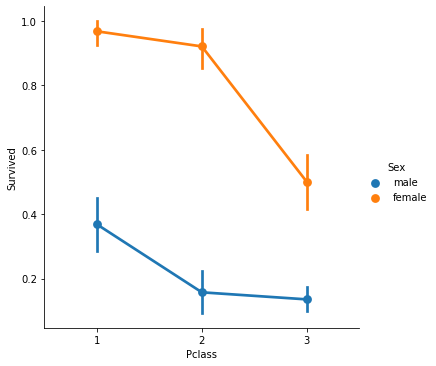

In [ ]:
sns.catplot(x='Pclass',y='Survived',kind='point',hue='Sex',data=data)
plt.show()


### Age y Fare
Como `Age`, `Fare`

In [ ]:
print('Pasajero más viejo:',data['Age'].max(),'Years')
print('Pasajero más joven:',data['Age'].min(),'Years')
print('Edad promedio:',round(data['Age'].mean(),2),'Years')

Pasajero más viejo: 80.0 Years
Pasajero más joven: 0.42 Years
Edad promedio: 29.7 Years


In [ ]:
data[['Age', 'Fare']].describe(percentiles=[0.05, 0.95])

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
5%,4.000000,7.225000
50%,28.000000,14.454200
95%,56.000000,112.079150
max,80.000000,512.329200


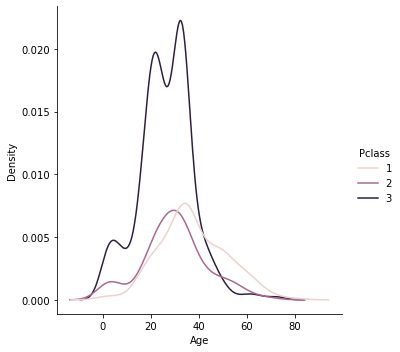

In [ ]:
sns.displot(data=data, x='Age', hue='Pclass', kind='kde')

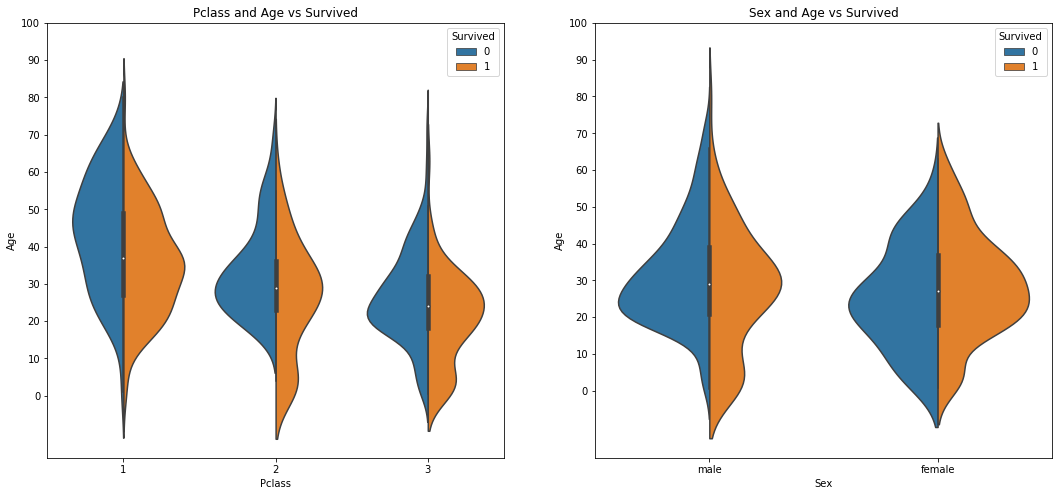

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### Observaciones
1. El número de niños se incrementa con Pclass y la supervivencia de niños (menores a 10 años) parece que es buena independientemente de la clase
2. Supervivencia de pasajeros de edades 20-50 de primera clase es buena y es aún mejor en mujeres.
3. Para los hombres la probabilidad de sobrevivir parece que disminuye con la edad.

Tenemos muchos nulos en la edad (117). Para reemplazar esos valores podríamos asignar la media de todos los datos. Pero ésta manera tiene problemas.

### Observaciones
1. Niños pequeños (< 5 años) se salvaron en mayor cantidad. Posiblemente evacuaron a niños y mujeres primero.
2. El PAsajero mas viejo (80 años) se salvó
3. Máximo número de muertes entre 30 - 40


### Categóricas
Como `Embarked`

Nos dice de qué puerto embarcaron los pasajeros.

In [ ]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

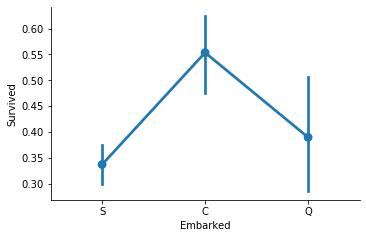

In [ ]:
sns.catplot(x='Embarked', y='Survived', kind='point',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

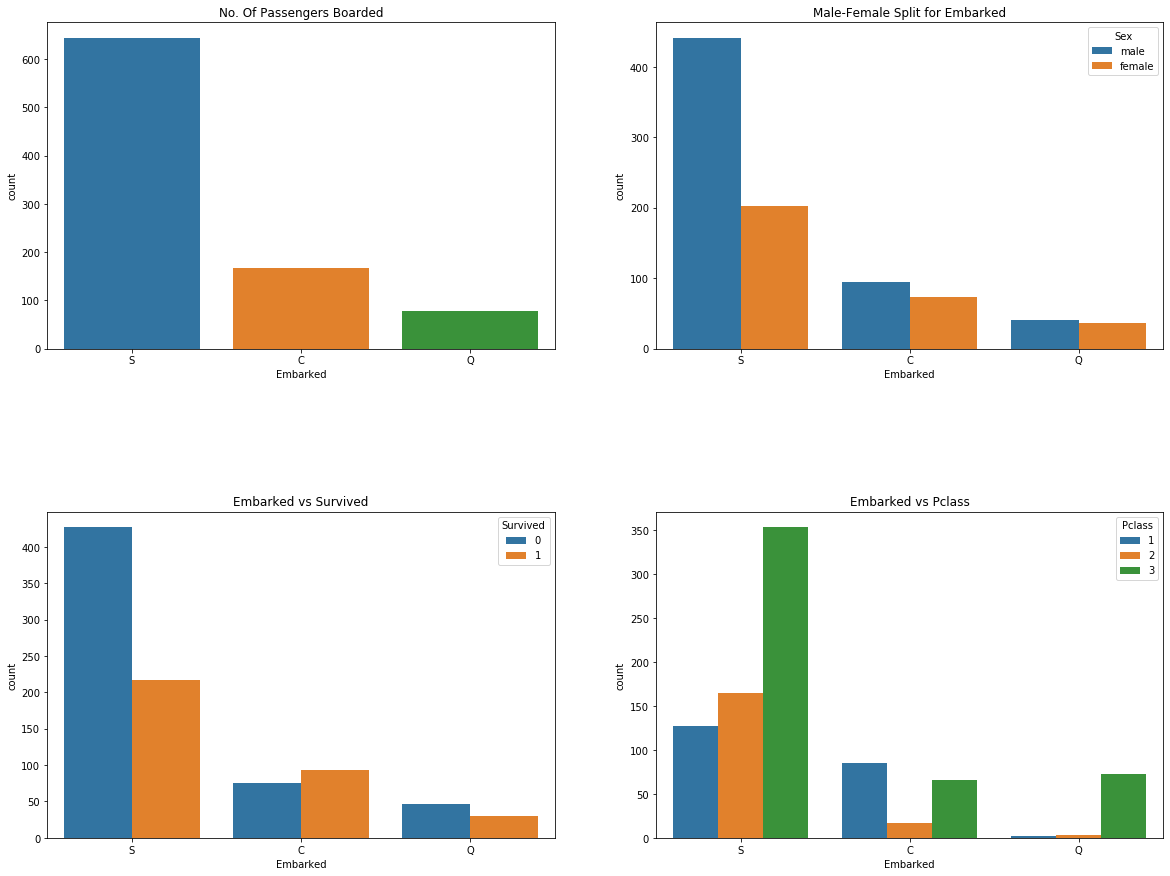

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

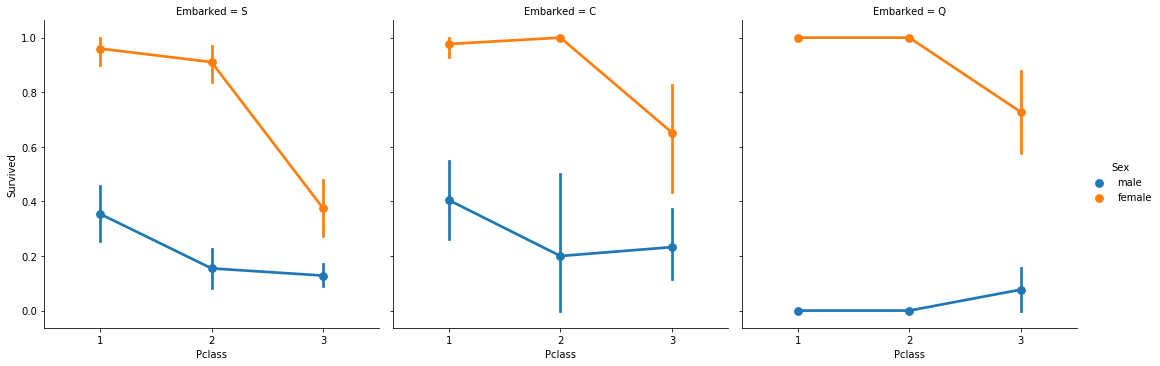

In [ ]:
sns.catplot(x='Pclass',y='Survived',kind='point',hue='Sex',col='Embarked',data=data, ci=95 )
plt.show()

1. La mayoría de los pasajeros abordaron desde **S** y éran de la clase 3.
2. Los pasajeron que embarcaron desde **C** tuvieron una buena proporción de supervivencia. La razón podría ser que hay más de Pclass 1 y Pclass 2.
3. El embarcadero **S** parece ser en el que la mayoría de Clase 3 embarcó. La probabilidad de supervivencia en el **S** es baja.
4. Casi el 95% de los pasajeros del embarcadero **Q** son de clase 3 

### SibSip
Esta variable representa si la persona iba sola o acompañado de familia.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife 

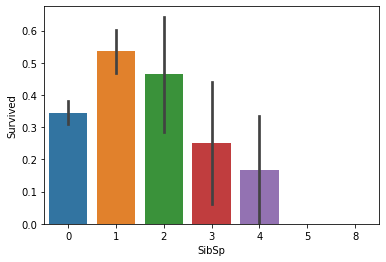

In [ ]:
sns.barplot(x='SibSp',y='Survived',data=data, ci=95)
# sns.catplot(x='SibSp',y='Survived',kind='point', data=data)


In [ ]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [ ]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Parch
Número de padres / hijos abordo

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


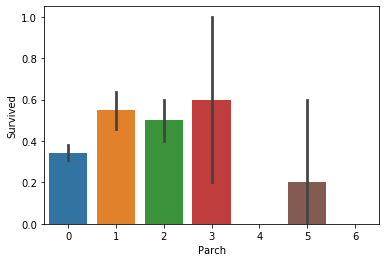

In [ ]:
sns.barplot(x='Parch',y='Survived',data=data)

### Fare
El precio del ticket que pagaron

In [ ]:
print('Máximo:',data['Fare'].max())
print('Mínimo:',data['Fare'].min())
print('Promedio:',data['Fare'].mean())

Máximo: 512.3292
Mínimo: 0.0
Promedio: 32.2042079685746


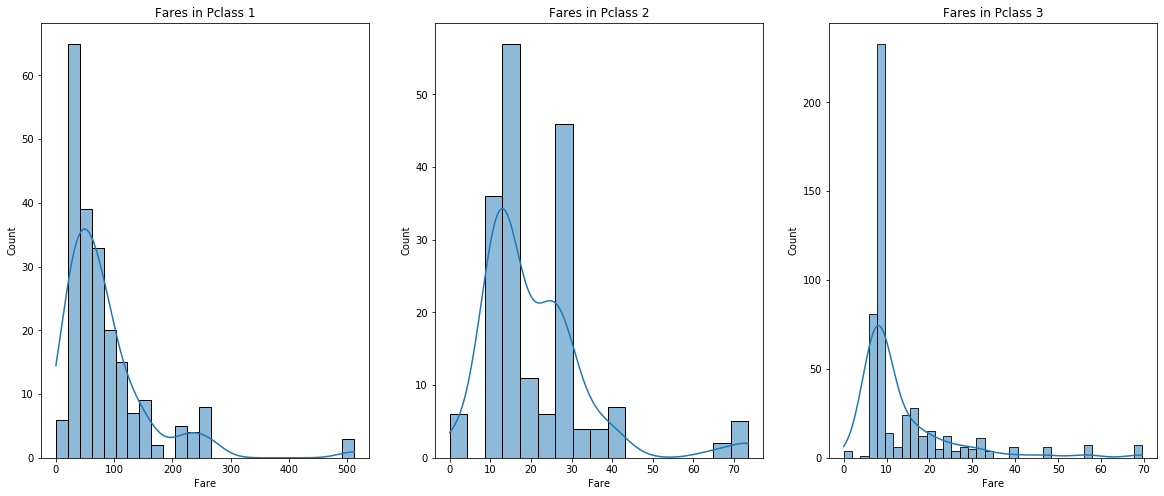

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.histplot(data[data['Pclass']==1].Fare,ax=ax[0], kde=True)
ax[0].set_title('Fares in Pclass 1')
sns.histplot(data[data['Pclass']==2].Fare,ax=ax[1], kde=True)
ax[1].set_title('Fares in Pclass 2')
sns.histplot(data[data['Pclass']==3].Fare,ax=ax[2], kde=True)
ax[2].set_title('Fares in Pclass 3')
plt.show()

___